<a href="https://colab.research.google.com/github/kaelaal/SmartWasteBinMonitoringSystem/blob/main/DFT_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

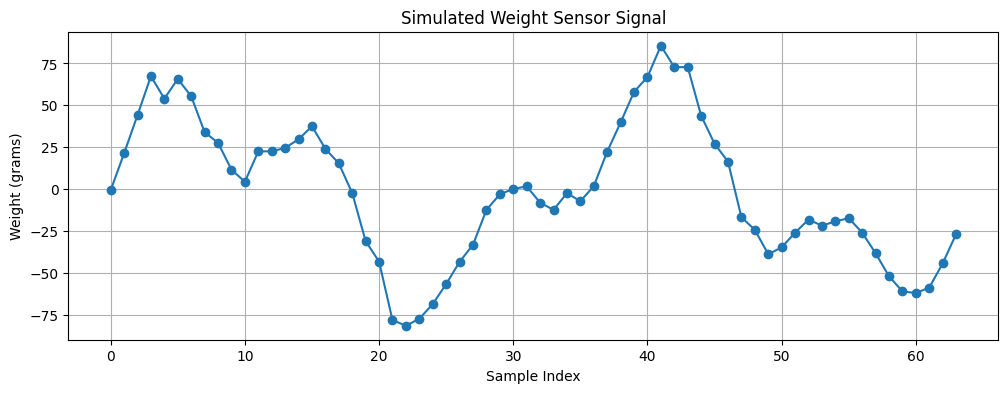

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 1200x400 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate weight sensor data with noise + a few frequency components
N = 64  # sample size
t = np.arange(N)

# Simulate a signal: combination of sine waves + noise
signal = (
    50 * np.sin(2 * np.pi * 2 * t / N) +
    30 * np.sin(2 * np.pi * 5 * t / N) +
    np.random.normal(0, 5, N)
)

# Plot original signal
plt.figure(figsize=(12, 4))
plt.plot(t, signal, marker='o')
plt.title("Simulated Weight Sensor Signal")
plt.xlabel("Sample Index")
plt.ylabel("Weight (grams)")
plt.grid(True)
plt.show()

# Compute DFT manually
def compute_dft(x):
    N = len(x)
    X = []
    for k in range(N):
        real = 0
        imag = 0
        for n in range(N):
            angle = 2 * np.pi * k * n / N
            real += x[n] * np.cos(angle)
            imag -= x[n] * np.sin(angle)
        X.append(np.sqrt(real**2 + imag**2))
    return np.array(X)

magnitude_spectrum = compute_dft(signal)

# Plot magnitude spectrum
freqs = np.arange(N // 2)
plt.figure(figsize=(12, 4))
plt.stem(freqs, magnitude_spectrum[:N // 2], use_line_collection=True)
plt.title("DFT Magnitude Spectrum")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()
